In [1]:
! pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
! kaggle datasets download -d rajatsurana979/fast-food-sales-report

  0% 0.00/122k [00:00<?, ?B/s]
100% 122k/122k [00:00<00:00, 70.9MB/s]


In [5]:
!unzip /content/fast-food-sales-report.zip

Archive:  /content/fast-food-sales-report.zip
  inflating: Balaji Fast Food Sales.csv  
  inflating: category distribution.JPG  


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score


# Data Preprocessing - 1

In [7]:
df = pd.read_csv('/content/Balaji Fast Food Sales.csv')
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [8]:
df.shape

(1000, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [10]:
# Dropping unnecessary (non feature) columns
useless_col = ['order_id','date','received_by']
df.drop(useless_col, axis = 1, inplace = True)

In [11]:
df.describe()

,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000
mean,33.315000,8.162000,275.230000
std,14.921744,4.413075,204.402979
min,20.000000,1.000000,20.000000
25%,20.000000,4.000000,120.000000
50%,25.000000,8.000000,240.000000
75%,50.000000,12.000000,360.000000
max,60.000000,15.000000,900.000000


In [12]:
df.isnull().sum()

item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
time_of_sale            0
dtype: int64

In [13]:
df['transaction_type'].value_counts()

Cash      476
Online    417
Name: transaction_type, dtype: int64

In [14]:
df['transaction_type'].fillna('Cash', inplace = True)

In [15]:
df.isnull().sum()

item_name             0
item_type             0
item_price            0
quantity              0
transaction_amount    0
transaction_type      0
time_of_sale          0
dtype: int64

# Exploratory data analysis (EDA) & Visualisations

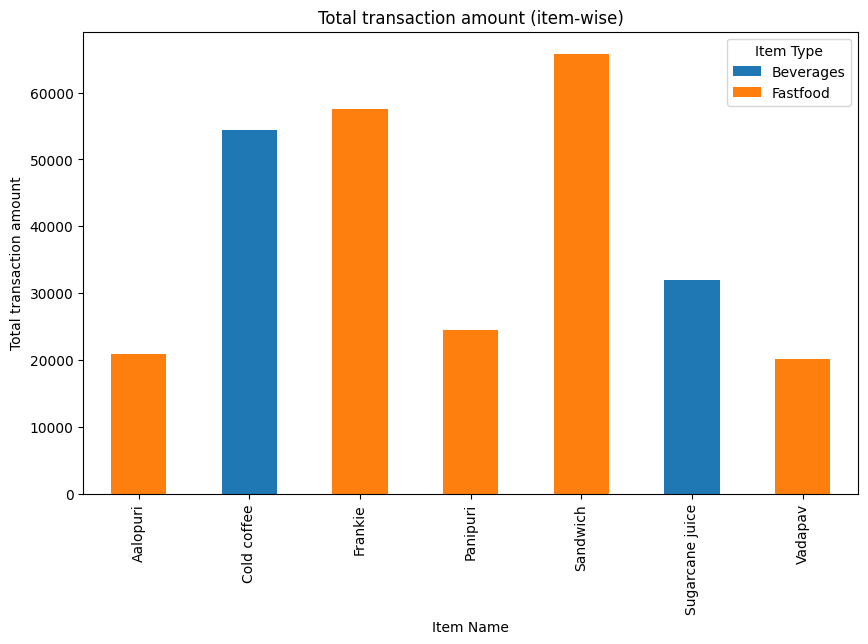

In [16]:
# Group the data by 'item_name' and 'item_type' and calculate the sum of 'transaction_amount'
grouped_data_1 = df.groupby(['item_name', 'item_type'])['transaction_amount'].sum().unstack(fill_value=0)
# Create a stacked bar chart
ax1 = grouped_data_1.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the axis labels and title
plt.xlabel('Item Name')
plt.ylabel('Total transaction amount')
plt.title('Total transaction amount (item-wise)')
plt.legend(title='Item Type')
plt.show()

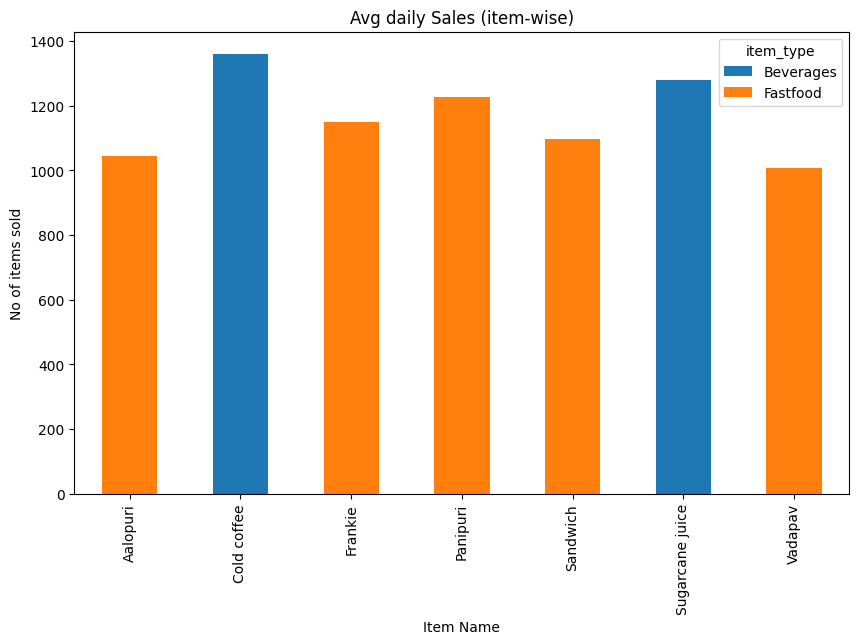

In [17]:
# Group the data by 'item_name' and 'item_type' and calculate the sum of 'transaction_amount'
grouped_data_2 = df.groupby(['item_name', 'item_type'])['quantity'].sum().unstack(fill_value=0)

# Create a stacked bar chart
grouped_data_2.plot(kind='bar', figsize=(10,6), stacked = True)

# Set the axis labels and title
plt.title("Avg daily Sales (item-wise)")
plt.xlabel('Item Name')
plt.ylabel('No of items sold')
plt.show()

Text(0, 0.5, 'Total Amount')

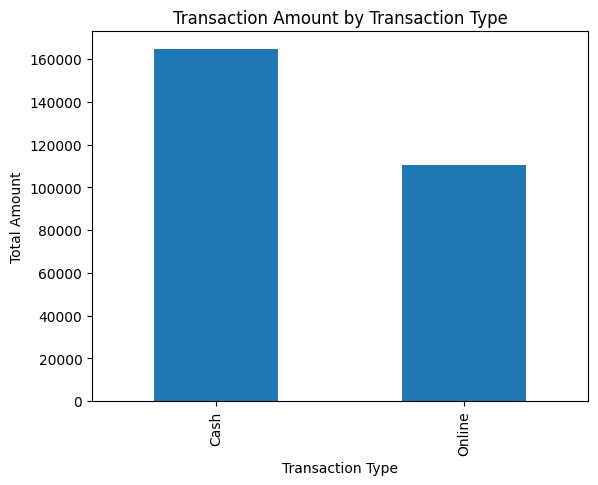

In [18]:
# Group the data by 'transaction_type' and calculate the sum of 'transaction_amount'
grouped_data_3 = df.groupby('transaction_type')['transaction_amount'].sum()

# Create a bar chart
grouped_data_3.plot(kind='bar', title='Transaction Amount by Transaction Type')

# Set the axis labels
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')

Text(0.5, 1.0, 'Transaction Time Distribution')

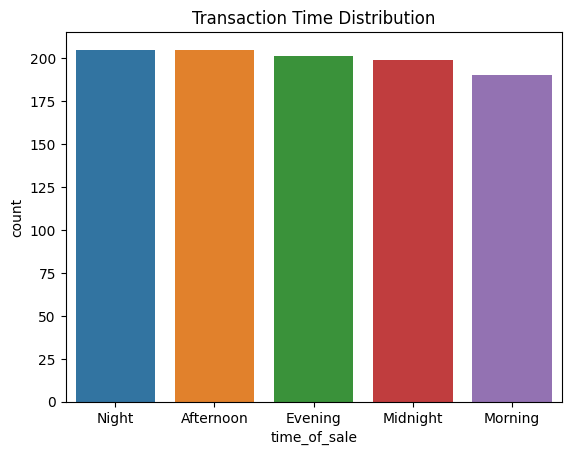

In [19]:
# Transaction Time Distribution
sns.countplot(x='time_of_sale', data=df, order=df['time_of_sale'].value_counts().index)
plt.title('Transaction Time Distribution')

Text(0.5, 0, 'Amount')

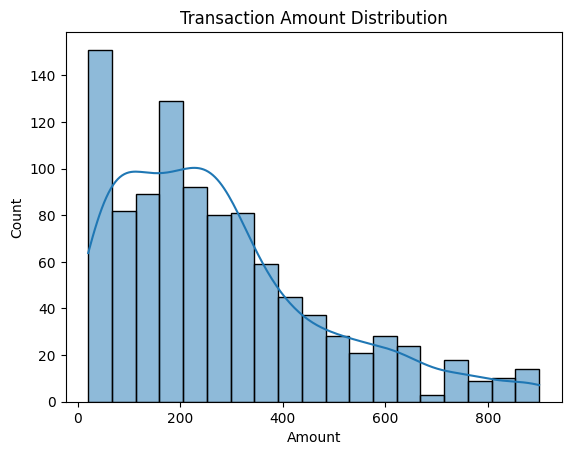

In [20]:
#Item Price Distribution
sns.histplot(df['transaction_amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')

In [21]:
# Item Type Distribution
fig = px.pie(df, names='item_type', title='Item Type Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')

# Data Preprocessing - 2

**Label Encoding**

In [22]:
le = LabelEncoder()
df['item_name']=le.fit_transform(df['item_name'])
df['item_type']=le.fit_transform(df['item_type'])
df['transaction_type']=le.fit_transform(df['transaction_type'])
df['time_of_sale']=le.fit_transform(df['time_of_sale'])

In [23]:
df.head()

,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,time_of_sale
0,0,1,20,13,260,0,4
1,6,1,20,15,300,0,0
2,6,1,20,1,20,0,0
3,5,0,25,6,150,1,4
4,5,0,25,8,200,1,1


**Outlier Checking**

<Axes: >

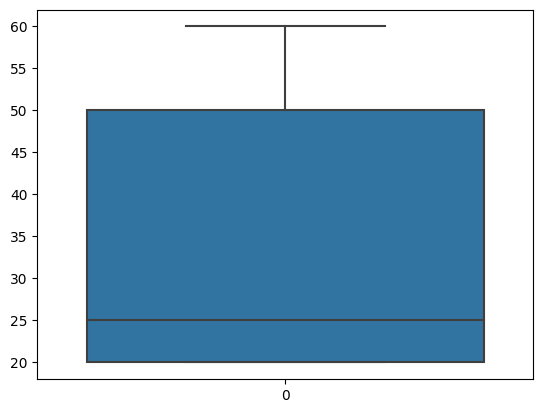

In [24]:
sns.boxplot(df['item_price'])

<Axes: >

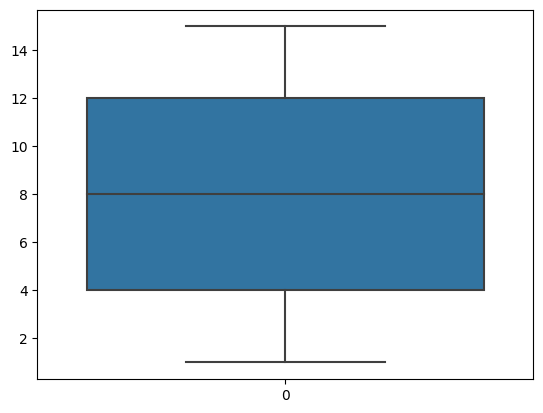

In [25]:
sns.boxplot(df['quantity'])

<Axes: >

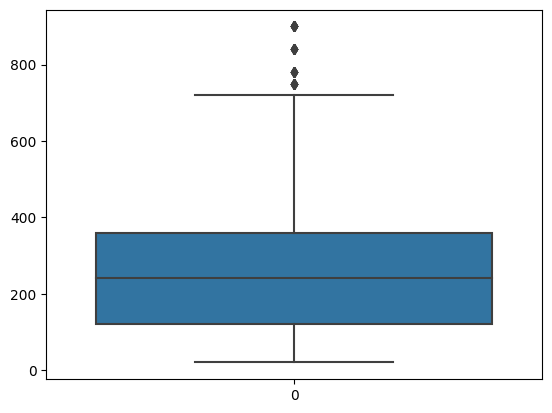

In [26]:
sns.boxplot(df['transaction_amount'])

In [27]:
# Outlier Removal using IQR
q1 = df['transaction_amount'].quantile(0.25) #Quartile 1
q3 = df['transaction_amount'].quantile(0.75) #Quartile 3
iqr = q3-q1
upper_limit = q3 + 1.5*iqr
df['transaction_amount'] = np.where(df['transaction_amount']>upper_limit,240,df['transaction_amount'])

<Axes: >

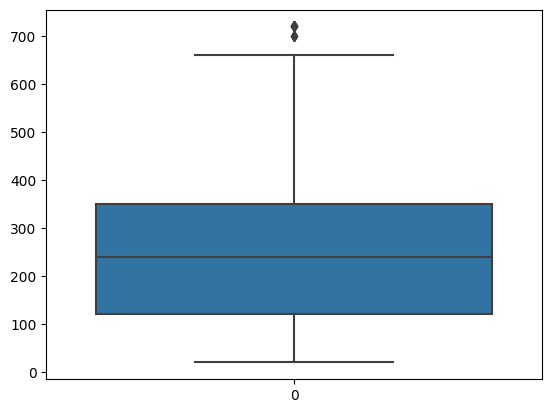

In [28]:
sns.boxplot(df['transaction_amount'])

**Finding correlation with Target Variable (Quantity)**

In [29]:
df.corr()['quantity'].sort_values(ascending = False)

quantity              1.000000
transaction_amount    0.680178
item_price            0.050361
time_of_sale          0.034010
item_name            -0.013804
item_type            -0.037189
transaction_type     -0.051753
Name: quantity, dtype: float64

**Splitting Dependent(y) and independent(x) variables**

In [30]:
y=df['quantity']
x=df.drop(columns=['quantity'],axis=1)

**Scaling Independent variables**

In [31]:
x.var()

item_name                 3.939263
item_type                 0.215620
item_price              222.658433
transaction_amount    27733.152753
transaction_type          0.243354
time_of_sale              2.032912
dtype: float64

In [32]:
scale=MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,item_name,item_type,item_price,transaction_amount,transaction_type,time_of_sale
0,0.000000,1.0,0.000,0.342857,0.0,1.00
1,1.000000,1.0,0.000,0.400000,0.0,0.00
2,1.000000,1.0,0.000,0.000000,0.0,0.00
3,0.833333,0.0,0.125,0.185714,1.0,1.00
4,0.833333,0.0,0.125,0.257143,1.0,0.25


**Train Test Split**

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [34]:
x_train.shape, y_train.shape

((700, 6), (700,))

In [35]:
x_test.shape, y_test.shape

((300, 6), (300,))

# Model Bulding - Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train,y_train)

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

**Accuracy of Linear Regression Model**

In [37]:
print("Training Accuracy = ", (r2_score(y_train,y_pred_train))*100,"%")
print("Testing Accuracy = ", (r2_score(y_test,y_pred_test))*100,"%")

Training Accuracy =  59.15143507082949 %
Testing Accuracy =  62.79928042400063 %


# Model Bulding - Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()

model_2.fit(x_train,y_train)

y_pred_test_2 = model_2.predict(x_test)
y_pred_train_2 = model_2.predict(x_train)

In [39]:
print("Training Accuracy = ", (r2_score(y_train,y_pred_train_2))*100,"%")
print("Testing Accuracy = ", (r2_score(y_test,y_pred_test_2))*100,"%")

Training Accuracy =  96.96988973493733 %
Testing Accuracy =  96.67953958141779 %
